In [1]:
from kitts import config
from kitts.utils import dataset_utils, data_vision
from kitts.dcl import collect_content, annotate_content
from kitts.core.model import model_builder

In [2]:
# importing the excel file
bdf = dataset_utils.accumulate_dataframe()
bdf = dataset_utils.condition_labels(dataframe = bdf, exclude = False)

# getting the shape
bdf.shape
#data.columns

Source Path exists: C:\Docs\kitts\data\annotated
Combined 19 files into one dataframe


(3867, 21)

In [3]:
#TFIDF Vectorizer
sv = model_builder.SimpleVectorize(bdf)
#TFIDF feature vectors
Tvectorizer, Tfeatures = sv.tfidf_vectorize(max_features = 10000)

feature_names = Tvectorizer.get_feature_names()
#words = [word for ind,word in enumerate(words)]# if not word.isdigit()]



#doc_word.shape # n_docs x m_words

In [4]:
#calls model class
model = model_builder.CorexModel(feature_vectors = Tfeatures, feature_names = feature_names, no_of_topics = 15 )
#creates corex model
corex,words = model.corex()

In [5]:
#list to no_of_words in all topics
topics = model.corex_topics(topic_model = corex, no_of_words = 20)
TOURISM_ANCHORS = ['sunset','places','art','beach','snow','mountain','shopping','food','history','fun','transport','water','chirstmas','happy']

0: sunset, dusk, afterglow, sunrise, morning, atmosphere, red, orange, bird, ducks, geese, swans, waterfowl, thatching, outcrop, atlas, circuit
1: places, holy, cats, felidae, carnivore, big, medium, sized, small, cat, mythology, byzantine, whiskers, mural, view, tunnel, masai, lion, plan, intersection
2: art, font, sculpture, statue, artifact, painting, brand, graphics, arts, logo, illustration, visual, circle, electric, event, poster, rectangle, pattern, advertising, metal
3: beach, aqua, sand, swimsuit, atoll, resort, seaside, sunlounger, bait, finned, fishing, products, ray, hedge, mesh
4: snow, slope, freezing, landform, glacial, ice, branch, phenomenon, twig, cap, geological, atmospheric, ski, recreation, winter, outdoor, trunk, sport, nunatak, boot
5: mountain, highland, natural, landscape, ecoregion, terrain, mountainous, nature, environment, grassland, range, community, space, plain, public, lot, larch, cumulus, material, hill
6: shopping, flowering, annual, lens, digital, cam

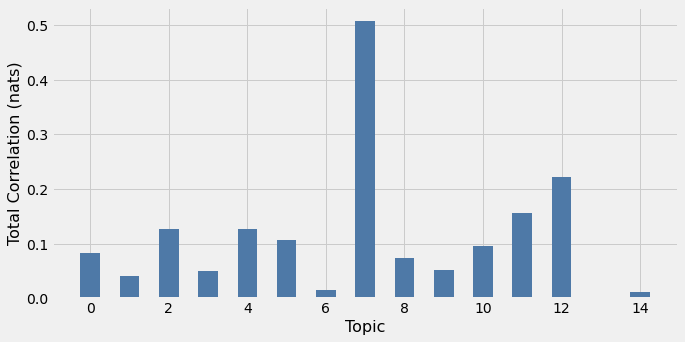

In [6]:
#Correlation plot
model.plot_corex(topic_model = corex)

In [ ]:
#generates various statisticsal reports
#model.corex_report(topic_model = corex, words=words)#, prefix = 'corex_visuals')

In [7]:
#Crceating clustered data file
model.clustered_data(topic_model = corex, data = bdf)

file created and saved at C:\Docs\kitts\data\clustered\Corex_Cluster_Data.csv
